In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import  mean_squared_error, r2_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('image_data3.csv')

In [3]:
class_ajanta = data[data['label'] == 'Ajanta Caves']
class_mysore = data[data['label'] == 'mysore_palace']
class_gateway = data[data['label'] == 'Gateway of India']

features_ajanta = class_ajanta.drop('label', axis=1)
features_mysore = class_mysore.drop('label', axis=1)
features_gateway = class_gateway.drop('label', axis=1)

features_ajanta = features_ajanta.to_numpy()
features_mysore = features_mysore.to_numpy()
features_gateway = features_gateway.to_numpy()

In [4]:
def a2():
    data = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data", usecols=["Customer", "Candies (#)", "Mangoes (Kg)", "Milk Packets (#)", "Payment (Rs)"])
    X = data[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]] 
    y = data[["Payment (Rs)"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mse ** 0.5
    mape = (abs(y_test - y_test_pred) / y_test).mean() * 100
    r2 = r2_score(y_test, y_test_pred)

    print(f'MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R²: {r2}')

In [5]:
a2()

MSE: 3346.1111111111118, RMSE: 57.8455798753121, MAPE: Payment (Rs)    32.12889
dtype: float64, R²: 0.14265786027444038


In [6]:
def a3():
    np.random.seed(42)
    X_train = np.random.randint(1, 11, size=(20, 2))
    y_train = np.where(X_train.sum(axis=1) > 10, 1, 0)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Training Data Scatter Plot')
    plt.show()

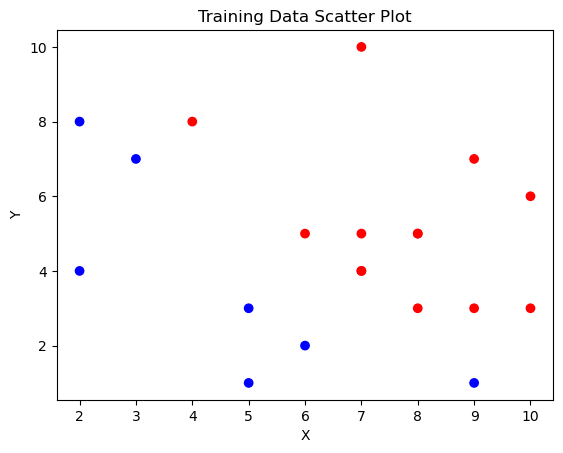

In [7]:
a3()

In [8]:
def a4():
    X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    test_points = np.c_[X_test.ravel(), Y_test.ravel()]
    np.random.seed(0)
    X_train = np.random.rand(100, 2) * 10
    y_train = np.random.choice([0, 1], size=100)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(test_points)
    plt.figure(figsize=(10, 8))
    plt.scatter(test_points[:, 0], test_points[:, 1], c=y_pred, cmap=plt.cm.Blues, alpha=0.5)
    plt.title('kNN Classification (k=3) of Test Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [9]:
def train_test():
    X = data.drop('label', axis=1)
    y = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = train_test()

In [11]:
def knn(X_train, y_train):
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    return neigh

In [12]:
neigh = knn(X_train, y_train)

In [13]:
def performance(neigh, X_test, y_test):
    accuracy = neigh.score(X_test, y_test)
    print(f'Accuracy: {accuracy}')
    y_pred = neigh.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

In [20]:

performance(neigh, X_test, y_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [14]:
def perform_grid_search(X_train, y_train):
    knn = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': list(range(1, 21))  # Testing values for k from 1 to 20
    }
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search

In [15]:
def visualize_two_features():
    feature1 = 50
    feature2 = 2000  
    
    ajanta_points = class_ajanta.iloc[:, [feature1, feature2]]
    mysore_points = class_mysore.iloc[:, [feature1, feature2]]
    
    plt.scatter(ajanta_points.iloc[:, 0], ajanta_points.iloc[:, 1], color='blue', label='Ajanta Caves')
    plt.scatter(mysore_points.iloc[:, 0], mysore_points.iloc[:, 1], color='red', label='Mysore Palace')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [16]:
def classify_and_plot():

    feature1 = 0
    feature2 = 200
    
    ajanta_points = class_ajanta.iloc[:, [feature1, feature2]]
    mysore_points = class_mysore.iloc[:, [feature1, feature2]]

    X_train = np.vstack((ajanta_points, mysore_points))
    y_train = np.array([0] * len(ajanta_points) + [1] * len(mysore_points))  # 0 for Ajanta, 1 for Mysore

    knn = KNeighborsClassifier(n_neighbors=55)
    knn.fit(X_train, y_train)

    x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    test_data = np.c_[x_test.ravel(), y_test.ravel()]

    predictions = knn.predict(test_data)
    predictions = predictions.reshape(x_test.shape)

    plt.contourf(x_test, y_test, predictions, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(ajanta_points.iloc[:, 0], ajanta_points.iloc[:, 1], color='blue')
    plt.scatter(mysore_points.iloc[:, 0], mysore_points.iloc[:, 1], color='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [18]:


grid_search = perform_grid_search(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_
print(f"Best k: {best_k}")


visualize_two_features()
classify_and_plot()

AttributeError: 'Flags' object has no attribute 'c_contiguous'